# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Ge the data
The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

>🔑 **Note:** We start with a smaller datset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-09-30 01:45:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   102MB/s    in 1.0s    

2023-09-30 01:45:36 (102 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data

And for computer vision project... this usually means visualizing many samples of your data.

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

# Walk through pizza_steak directory and list numbe rof files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [9]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Sep 29 22:49 .
drwxr-xr-x 1 root root 4096 Sep 29 22:50 ..
drwxr-xr-x 4 root root 4096 Sep 29 22:49 test
drwxr-xr-x 4 root root 4096 Sep 29 22:49 train


In [10]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [14]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a lost of class_names from the subdirectories

print(class_names)

['pizza' 'steak']


In [15]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

['2285269.jpg']
Image shape: (512, 512, 3)


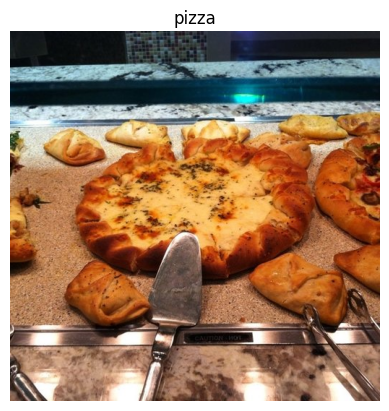

In [33]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [34]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 21,  26,  30],
        [ 17,  22,  26],
        [ 15,  20,  24],
        ...,
        [ 35,  36,  41],
        [ 37,  38,  43],
        [ 37,  38,  43]],

       [[ 21,  26,  30],
        [ 17,  22,  26],
        [ 14,  19,  23],
        ...,
        [ 34,  35,  40],
        [ 36,  37,  42],
        [ 36,  37,  42]],

       [[ 21,  26,  30],
        [ 16,  21,  25],
        [ 14,  19,  23],
        ...,
        [ 34,  35,  40],
        [ 34,  35,  40],
        [ 35,  36,  41]],

       ...,

       [[134,  96,  73],
        [137,  99,  76],
        [139, 101,  80],
        ...,
        [ 84,  57,  48],
        [ 91,  63,  52],
        [ 82,  54,  43]],

       [[130,  92,  69],
        [137,  99,  76],
        [141, 103,  82],
        ...,
        [103,  75,  64],
        [ 87,  59,  48],
        [ 86,  58,  47]],

       [[130,  92,  69],
        [140, 102,  79],
        [143, 105,  84],
        ...,
        [129, 101,  9

In [35]:
# View the image shape
img.shape  # Returns width, height, colour channels

(512, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. knowing this, one of the most common preprocessing steps for working with images is to scale(also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [36]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.08235294, 0.10196078, 0.11764706],
        [0.06666667, 0.08627451, 0.10196078],
        [0.05882353, 0.07843137, 0.09411765],
        ...,
        [0.1372549 , 0.14117647, 0.16078431],
        [0.14509804, 0.14901961, 0.16862745],
        [0.14509804, 0.14901961, 0.16862745]],

       [[0.08235294, 0.10196078, 0.11764706],
        [0.06666667, 0.08627451, 0.10196078],
        [0.05490196, 0.0745098 , 0.09019608],
        ...,
        [0.13333333, 0.1372549 , 0.15686275],
        [0.14117647, 0.14509804, 0.16470588],
        [0.14117647, 0.14509804, 0.16470588]],

       [[0.08235294, 0.10196078, 0.11764706],
        [0.0627451 , 0.08235294, 0.09803922],
        [0.05490196, 0.0745098 , 0.09019608],
        ...,
        [0.13333333, 0.1372549 , 0.15686275],
        [0.13333333, 0.1372549 , 0.15686275],
        [0.1372549 , 0.14117647, 0.16078431]],

       ...,

       [[0.5254902 , 0.37647059, 0.28627451],
        [0.5372549 , 0.38823529, 0.29803922],
        [0.54509804, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 143ms/step - loss: 0.5839 - accuracy: 0.6960 - val_loss: 0.4045 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4537 - accuracy: 0.8047 - val_loss: 0.3932 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4396 - accuracy: 0.7973 - val_loss: 0.4248 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3820 - accuracy: 0.8427 - val_loss: 0.4014 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3298 - accuracy: 0.8747 - val_loss: 0.3928 - val_accuracy: 0.8280


🔑 **Note:** If the above cell is taking longer than -10 seconds per epoch, make sure you're using a GPU by going to Runtime ---> Change Runtime Type -> Hardware Accelator -> GPU (you may have to rerun some cells above)

In [4]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

**Practice/exercise:** Go through the CNN explainer website for a minimum of 20 minutes and compare our neural network with thiers.